![WhatsApp Image 2024-10-07 at 11.29.47_84f53d9c.jpg](<attachment:WhatsApp Image 2024-10-07 at 11.29.47_84f53d9c.jpg>)
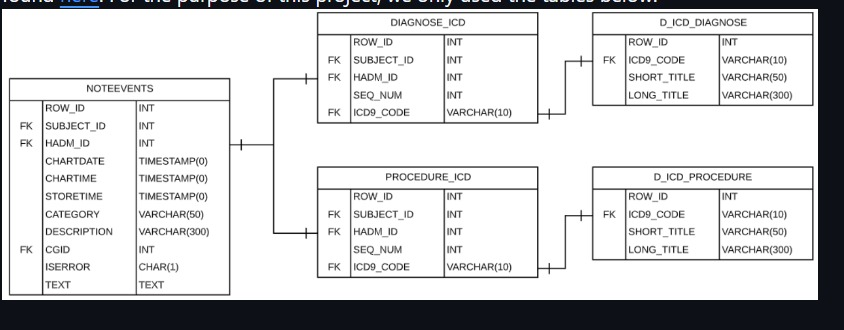

In [1]:
import numpy as np
import pandas as pd
import os 
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
noteevents=pd.read_csv(r'data\NOTEEVENTS.csv')
diagnoses_icd=pd.read_csv(r'D:\FINALYEARPROJECTREC\data\DIAGNOSES_ICD.csv')
procedure_icd=pd.read_csv(r'data\PROCEDURES_ICD.csv')
d_icd_diagnoses=pd.read_csv(r'data\D_ICD_DIAGNOSES (3).csv')
d_icd_procedure=pd.read_csv(r'data\D_ICD_PROCEDURES.csv')

In [3]:
procedure_icd

,ow_id,subject_id,hadm_id,seq_num,icd9_code
0,3994,10114,167957,1,3605
1,3995,10114,167957,2,3722
2,3996,10114,167957,3,8856
3,3997,10114,167957,4,9920
4,3998,10114,167957,5,9671
...,...,...,...,...,...
501,230170,41976,179418,2,3893
502,235193,41976,155297,1,3893
503,235194,41976,155297,2,966
504,238588,41976,125013,1,3893


In [4]:
## Preprocessing on Given Data:

noteevents.columns=noteevents.columns.str.upper()
procedure_icd.columns=procedure_icd.columns.str.upper()
diagnoses_icd.columns=diagnoses_icd.columns.str.upper()
d_icd_procedure.columns=d_icd_procedure.columns.str.upper()
d_icd_diagnoses.columns=d_icd_diagnoses.columns.str.upper()
procedure_icd['ROW_ID']=procedure_icd['OW_ID']
procedure_icd.drop(['OW_ID'],axis=1,inplace=True)
procedure_icd.head(2)

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID
0,10114,167957,1,3605,3994
1,10114,167957,2,3722,3995


In [5]:
diagnoses_icd.head(1)

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301


In [6]:
d_icd_diagnoses.head(1)

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."


In [7]:
keep=noteevents[['HADM_ID','CATEGORY','TEXT']]

In [8]:
keep 

,HADM_ID,CATEGORY,TEXT
0,188442.0,Discharge summary,Admission Date: [**2183-9-25**] Dischar...
1,193793.0,Discharge summary,Admission Date: [**2184-1-16**] Dischar...
2,118446.0,Discharge summary,Admission Date: [**2103-4-11**] ...
3,157985.0,Discharge summary,Admission Date: [**2103-10-7**] Dischar...
4,189488.0,Discharge summary,Admission Date: [**2131-4-2**] D...
...,...,...,...
2083175,186787.0,Discharge summary,Admission Date: [**2198-5-31**] ...
2083176,156868.0,Discharge summary,Admission Date: [**2168-12-29**] Discharg...
2083177,156868.0,Discharge summary,Admission Date: [**2168-12-29**] Discha...
2083178,156868.0,Discharge summary,Admission Date: [**2168-12-29**] Discha...


In [9]:
len(diagnoses_icd['ICD9_CODE'].unique())

6985

In [10]:
keeps=keep.groupby(['HADM_ID']).agg({'TEXT': ' '.join,'CATEGORY': ' '.join})

In [11]:
keeps.head()

,TEXT,CATEGORY
HADM_ID,,
100001.0,Admission Date: [**2117-9-11**] ...,Discharge summary Radiology
100003.0,Admission Date: [**2150-4-17**] ...,Discharge summary Echo ECG Nursing Nursing Phy...
100006.0,Admission Date: [**2108-4-6**] Discharg...,Discharge summary Discharge summary Echo ECG R...
100007.0,Admission Date: [**2145-3-31**] ...,Discharge summary ECG Nursing/other Nursing/ot...
100009.0,Admission Date: [**2162-5-16**] ...,Discharge summary Echo ECG Radiology Radiology...


In [12]:
keeps.shape

(58361, 2)

In [13]:
# len(keeps['HADM_ID'].unique())

In [14]:
diagnoses_dict = {}
for i in range(len(diagnoses_icd)):
    entry = diagnoses_icd.iloc[i]
    hadm = entry['HADM_ID']
    icd = entry['ICD9_CODE']
    if hadm not in diagnoses_dict:
        diagnoses_dict[hadm] = [icd]
    else:
        diagnoses_dict[hadm].append(icd)
        

In [15]:
procedure_dict = {}
for i in range(len(procedure_icd)):
    entry = procedure_icd.iloc[i]
    hadm = entry['HADM_ID']
    icd = entry['ICD9_CODE']
    if hadm not in procedure_dict:
        procedure_dict[hadm] = [icd]
    else:
        procedure_dict[hadm].append(icd)

In [16]:
# procedure_dict

In [17]:
diagnoses_df=pd.DataFrame.from_dict(diagnoses_dict,orient='index')
procedure_df=pd.DataFrame.from_dict(procedure_dict,orient='index')

In [18]:
diagnoses_df.columns = ['DIAG_CODE'+str(i) for i in range(1,len(diagnoses_df.columns)+1)]
diagnoses_df.index.name = 'HADM_ID'
procedure_df.columns = ['PRCD_CODE'+str(i) for i in range(1,len(procedure_df.columns)+1)]
procedure_df.index.name = 'HADM_ID'


In [19]:
diagnoses_df 

,DIAG_CODE1,DIAG_CODE2,DIAG_CODE3,DIAG_CODE4,DIAG_CODE5,DIAG_CODE6,DIAG_CODE7,DIAG_CODE8,DIAG_CODE9,DIAG_CODE10,...,DIAG_CODE30,DIAG_CODE31,DIAG_CODE32,DIAG_CODE33,DIAG_CODE34,DIAG_CODE35,DIAG_CODE36,DIAG_CODE37,DIAG_CODE38,DIAG_CODE39
HADM_ID,,,,,,,,,,,,,,,,,,,,,
172335,40301,486,58281,5855,4254,2762,7100,2767,7243,45829,...,None,None,None,None,None,None,None,None,None,None
173633,40301,5856,58381,7100,5589,2875,28521,45829,32723,22804,...,None,None,None,None,None,None,None,None,None,None
174105,53100,41071,2859,41401,725,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
109976,1915,3314,53081,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
178393,41401,4111,48283,2859,2720,3051,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172304,20280,3485,7843,4019,2720,53081,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
152542,566,25062,3572,V5867,42731,4019,4280,53081,3051,27800,...,None,None,None,None,None,None,None,None,None,None
161999,43411,3485,3484,430,34830,99731,51883,5990,34291,29181,...,None,None,None,None,None,None,None,None,None,None


In [20]:
diagnoses_df['DIAG_CODES']=diagnoses_df[diagnoses_df.columns[:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

procedure_df['PROC_CODES']=procedure_df[procedure_df.columns[:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [21]:
codes_df = pd.merge(diagnoses_df, procedure_df, how='outer', on='HADM_ID')

In [22]:
codes_df['DIAG_CODES'].shape

(58976,)

In [23]:
diagnoses_df.head()

,DIAG_CODE1,DIAG_CODE2,DIAG_CODE3,DIAG_CODE4,DIAG_CODE5,DIAG_CODE6,DIAG_CODE7,DIAG_CODE8,DIAG_CODE9,DIAG_CODE10,...,DIAG_CODE31,DIAG_CODE32,DIAG_CODE33,DIAG_CODE34,DIAG_CODE35,DIAG_CODE36,DIAG_CODE37,DIAG_CODE38,DIAG_CODE39,DIAG_CODES
HADM_ID,,,,,,,,,,,,,,,,,,,,,
172335,40301,486,58281,5855,4254,2762,7100,2767,7243,45829,...,None,None,None,None,None,None,None,None,None,"40301,486,58281,5855,4254,2762,7100,2767,7243,..."
173633,40301,5856,58381,7100,5589,2875,28521,45829,32723,22804,...,None,None,None,None,None,None,None,None,None,"40301,5856,58381,7100,5589,2875,28521,45829,32..."
174105,53100,41071,2859,41401,725,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"53100,41071,2859,41401,725"
109976,1915,3314,53081,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"1915,3314,53081"
178393,41401,4111,48283,2859,2720,3051,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"41401,4111,48283,2859,2720,3051"


In [24]:
codes_df

,DIAG_CODE1,DIAG_CODE2,DIAG_CODE3,DIAG_CODE4,DIAG_CODE5,DIAG_CODE6,DIAG_CODE7,DIAG_CODE8,DIAG_CODE9,DIAG_CODE10,...,PRCD_CODE14,PRCD_CODE15,PRCD_CODE16,PRCD_CODE17,PRCD_CODE18,PRCD_CODE19,PRCD_CODE20,PRCD_CODE21,PRCD_CODE22,PROC_CODES
HADM_ID,,,,,,,,,,,,,,,,,,,,,
172335,40301,486,58281,5855,4254,2762,7100,2767,7243,45829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173633,40301,5856,58381,7100,5589,2875,28521,45829,32723,22804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174105,53100,41071,2859,41401,725,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109976,1915,3314,53081,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178393,41401,4111,48283,2859,2720,3051,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172304,20280,3485,7843,4019,2720,53081,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152542,566,25062,3572,V5867,42731,4019,4280,53081,3051,27800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161999,43411,3485,3484,430,34830,99731,51883,5990,34291,29181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
diagnoses=diagnoses_df[['DIAG_CODES']]
procedure=procedure_df[['PROC_CODES']]
codes=pd.merge(diagnoses,procedure,how='outer',on='HADM_ID')

In [26]:
codes

,DIAG_CODES,PROC_CODES
HADM_ID,,
172335,"40301,486,58281,5855,4254,2762,7100,2767,7243,...",NaN
173633,"40301,5856,58381,7100,5589,2875,28521,45829,32...",NaN
174105,"53100,41071,2859,41401,725",NaN
109976,"1915,3314,53081",NaN
178393,"41401,4111,48283,2859,2720,3051",NaN
...,...,...
172304,"20280,3485,7843,4019,2720,53081",NaN
152542,"566,25062,3572,V5867,42731,4019,4280,53081,305...",NaN
161999,"43411,3485,3484,430,34830,99731,51883,5990,342...",NaN


In [27]:
codes.to_csv(r'D:\FINALYEARPROJECTREC\artifacts\CODES.csv')

In [28]:
merged_df=pd.merge(keeps,codes,on='HADM_ID',how='left')

In [29]:
merged_df

,TEXT,CATEGORY,DIAG_CODES,PROC_CODES
HADM_ID,,,,
100001.0,Admission Date: [**2117-9-11**] ...,Discharge summary Radiology,"25013,3371,5849,5780,V5867,25063,5363,4580,250...",NaN
100003.0,Admission Date: [**2150-4-17**] ...,Discharge summary Echo ECG Nursing Nursing Phy...,"53100,2851,07054,5715,45621,53789,4019,53550,7823",NaN
100006.0,Admission Date: [**2108-4-6**] Discharg...,Discharge summary Discharge summary Echo ECG R...,"49320,51881,486,20300,2761,7850,3090,V1251,V1582",NaN
100007.0,Admission Date: [**2145-3-31**] ...,Discharge summary ECG Nursing/other Nursing/ot...,"56081,5570,9973,486,4019",NaN
100009.0,Admission Date: [**2162-5-16**] ...,Discharge summary Echo ECG Radiology Radiology...,"41401,99604,4142,25000,27800,V8535,4148,4111,V...",NaN
...,...,...,...,...
199993.0,Admission Date: [**2161-10-23**] Discha...,Discharge summary ECG ECG ECG ECG ECG ECG Radi...,"41031,42821,42731,4271,5180,4240,2760,5119,5184",NaN
199994.0,Admission Date: [**2188-7-7**] Discharg...,Discharge summary ECG Radiology Radiology Radi...,"486,4280,51881,3970,496,4169,585,42732,2762",NaN
199995.0,Admission Date: [**2137-12-11**] Discha...,Discharge summary Echo ECG ECG ECG ECG ECG Rad...,"4210,7464,42971,30401,4412,44284,V1259,04111,3...",NaN


In [30]:
SAMPLE=merged_df.sample(n=20000)

In [31]:
SAMPLE.to_csv(r'D:\FINALYEARPROJECTREC\artifacts\SAMPLE_20K.csv')

In [32]:
SAMPLE.columns

Index(['TEXT', 'CATEGORY', 'DIAG_CODES', 'PROC_CODES'], dtype='object')

In [33]:
SAMPLE

,TEXT,CATEGORY,DIAG_CODES,PROC_CODES
HADM_ID,,,,
146115.0,Admission Date: [**2159-2-25**] ...,Discharge summary Echo ECG ECG ECG Nursing Nur...,"4920,51881,4150,7994,2762,49121,42830,4280,238...",NaN
121889.0,Admission Date: [**2138-3-10**] ...,Discharge summary ECG ECG ECG ECG Radiology Ra...,"5849,5609,2767,4280,42731,20300,5789,42732,414...",NaN
170374.0,Admission Date: [**2153-3-19**] ...,Discharge summary ECG Radiology Radiology Nurs...,"430,5990,4019,43490,34690",NaN
191619.0,Admission Date: [**2188-3-4**] D...,Discharge summary Echo Echo ECG ECG ECG ECG Ra...,"41071,4280,496,5849,5781,78551,41401,V1005,V10...",NaN
128946.0,Admission Date: [**2108-8-22**] ...,Discharge summary Echo ECG ECG Radiology Radio...,"43491,78003,7843,725,4019,41401,412,2724,4264",NaN
...,...,...,...,...
178275.0,Admission Date: [**2167-7-27**] Dischar...,Discharge summary Discharge summary Discharge ...,"5849,5728,5712,5990,0417,2910,03819,42731,5070",NaN
104018.0,Family Information Next of [**Doctor First ...,Social Work Nursing Nursing Nursing Nursing Nu...,"88000,9038,E966",NaN
195908.0,Admission Date: [**2190-1-29**] Discharge...,Discharge summary Echo ECG ECG ECG Radiology R...,"5738,4590,7895,79579,2875,7100,58281,585,28521",NaN


## **Codes to Dict**

In [34]:
sample_ids=SAMPLE.index
sample_ids

Index([146115.0, 121889.0, 170374.0, 191619.0, 128946.0, 101743.0, 127266.0,
       142724.0, 199190.0, 120316.0,
       ...
       108923.0, 148301.0, 127603.0, 152306.0, 148801.0, 178275.0, 104018.0,
       195908.0, 173420.0, 169557.0],
      dtype='float64', name='HADM_ID', length=20000)

In [35]:
flt_diag=diagnoses_icd[diagnoses_icd['HADM_ID'].isin(sample_ids)]
flt_proc=procedure_icd[procedure_icd['HADM_ID'].isin(sample_ids)]

In [36]:
flt_proc

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID
12,10069,146672,1,9915,9841
13,10069,146672,2,966,9842
14,10069,146672,3,3322,9843
15,10069,146672,4,9672,9844
16,10069,146672,5,9604,9845
...,...,...,...,...,...
501,41976,179418,2,3893,230170
502,41976,155297,1,3893,235193
503,41976,155297,2,966,235194
504,41976,125013,1,3893,238588


In [37]:
flt_diag

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
650995,639751,97488,152542,7.0,4280
650996,639752,97488,152542,8.0,53081
650997,639753,97488,152542,9.0,3051
650998,639754,97488,152542,10.0,27800


In [38]:
diag_keep=flt_diag['ICD9_CODE'].value_counts()[:300]
proc_keep=flt_proc['ICD9_CODE'].value_counts()[:100]

In [39]:
diag_keep,proc_keep

(ICD9_CODE
 4019     7116
 4280     4467
 42731    4336
 41401    4280
 25000    3136
          ... 
 7470      144
 7806      144
 V1588     144
 4373      143
 V293      142
 Name: count, Length: 300, dtype: int64,
 ICD9_CODE
 3893    24
 966     13
 9604     9
 9671     8
 9672     8
 9904     7
 9915     4
 5491     4
 3995     3
 3404     3
 331      3
 3723     2
 4399     2
 3891     2
 4513     2
 311      2
 8872     2
 8191     2
 3895     2
 8856     2
 9907     2
 3324     2
 9229     1
 9605     1
 4613     1
 4516     1
 4252     1
 3974     1
 8841     1
 9910     1
 41       1
 8151     1
 7869     1
 4223     1
 3491     1
 9723     1
 8914     1
 4233     1
 9921     1
 4525     1
 3990     1
 3772     1
 3783     1
 9962     1
 9390     1
 9749     1
 14       1
 4432     1
 8964     1
 5061     1
 3712     1
 9960     1
 3322     1
 3950     1
 9702     1
 Name: count, dtype: int64)

In [40]:
diag_keep.index

Index(['4019', '4280', '42731', '41401', '25000', '5849', '2724', '51881',
       '5990', '53081',
       ...
       '85221', '7766', '44020', '7661', '43820', '7470', '7806', 'V1588',
       '4373', 'V293'],
      dtype='object', name='ICD9_CODE', length=300)

In [41]:
diag2idx,idx2diag={},{}
for d in diag_keep.index:
    if d not in diag2idx:
        idx2diag[len(idx2diag)] =d
        diag2idx[d]=len(diag2idx)
        
proc2idx,idx2proc={},{}
for p in proc_keep.index:
    if p not in proc2idx:
        idx2proc[len(idx2proc)] =p
        proc2idx[p]=len(proc2idx)

In [42]:
import pickle

In [43]:
with open(r'D:\FINALYEARPROJECTREC\artifacts\diag2idx.pickle','wb') as f:
    pickle.dump(diag2idx,f,pickle.HIGHEST_PROTOCOL)
with open(r'D:\FINALYEARPROJECTREC\artifacts\idx2diag.pickle','wb') as f:
    pickle.dump(idx2diag,f,pickle.HIGHEST_PROTOCOL)
with open(r'D:\FINALYEARPROJECTREC\artifacts\proc2idx.pickle','wb') as f:
    pickle.dump(proc2idx,f,pickle.HIGHEST_PROTOCOL)
with open(r'D:\FINALYEARPROJECTREC\artifacts\idx2proc.pickle','wb') as f:
    pickle.dump(idx2proc,f,pickle.HIGHEST_PROTOCOL)

## **CONVERT CODE LIST:**

In [44]:
def diag_code2idx(org_lst):
    coded_lst = []
    for c in org_lst.split(','):
        if c in diag2idx:
            coded_lst.append(diag2idx[c])
    return coded_lst

In [45]:
def proc_code2idx(org_lst):
    coded_lst=[]
    for c in org_lst.split(','):
        c_=int(str(c).split('.')[0])
        if c_ in proc2idx:
            coded_lst.append(proc2idx[c_])
    
    return coded_lst

In [46]:
SAMPLE

,TEXT,CATEGORY,DIAG_CODES,PROC_CODES
HADM_ID,,,,
146115.0,Admission Date: [**2159-2-25**] ...,Discharge summary Echo ECG ECG ECG Nursing Nur...,"4920,51881,4150,7994,2762,49121,42830,4280,238...",NaN
121889.0,Admission Date: [**2138-3-10**] ...,Discharge summary ECG ECG ECG ECG Radiology Ra...,"5849,5609,2767,4280,42731,20300,5789,42732,414...",NaN
170374.0,Admission Date: [**2153-3-19**] ...,Discharge summary ECG Radiology Radiology Nurs...,"430,5990,4019,43490,34690",NaN
191619.0,Admission Date: [**2188-3-4**] D...,Discharge summary Echo Echo ECG ECG ECG ECG Ra...,"41071,4280,496,5849,5781,78551,41401,V1005,V10...",NaN
128946.0,Admission Date: [**2108-8-22**] ...,Discharge summary Echo ECG ECG Radiology Radio...,"43491,78003,7843,725,4019,41401,412,2724,4264",NaN
...,...,...,...,...
178275.0,Admission Date: [**2167-7-27**] Dischar...,Discharge summary Discharge summary Discharge ...,"5849,5728,5712,5990,0417,2910,03819,42731,5070",NaN
104018.0,Family Information Next of [**Doctor First ...,Social Work Nursing Nursing Nursing Nursing Nu...,"88000,9038,E966",NaN
195908.0,Admission Date: [**2190-1-29**] Discharge...,Discharge summary Echo ECG ECG ECG Radiology R...,"5738,4590,7895,79579,2875,7100,58281,585,28521",NaN


In [47]:
SAMPLE['CODED_DIAG']=SAMPLE['DIAG_CODES'].apply(diag_code2idx)
# SAMPLE['CODED_PROC']=SAMPLE['PROC_CODES'].apply(proc_code2idx)

In [48]:
SAMPLE

,TEXT,CATEGORY,DIAG_CODES,PROC_CODES,CODED_DIAG
HADM_ID,,,,,
146115.0,Admission Date: [**2159-2-25**] ...,Discharge summary Echo ECG ECG ECG Nursing Nur...,"4920,51881,4150,7994,2762,49121,42830,4280,238...",NaN,"[7, 17, 106, 163, 1, 28]"
121889.0,Admission Date: [**2138-3-10**] ...,Discharge summary ECG ECG ECG ECG Radiology Ra...,"5849,5609,2767,4280,42731,20300,5789,42732,414...",NaN,"[5, 49, 1, 2, 79, 100, 3, 0, 4, 10]"
170374.0,Admission Date: [**2153-3-19**] ...,Discharge summary ECG Radiology Radiology Nurs...,"430,5990,4019,43490,34690",NaN,"[190, 8, 0, 234]"
191619.0,Admission Date: [**2188-3-4**] D...,Discharge summary Echo Echo ECG ECG ECG ECG Ra...,"41071,4280,496,5849,5781,78551,41401,V1005,V10...",NaN,"[32, 1, 18, 5, 171, 112, 3, 181, 239, 0, 14, 5..."
128946.0,Admission Date: [**2108-8-22**] ...,Discharge summary Echo ECG ECG Radiology Radio...,"43491,78003,7843,725,4019,41401,412,2724,4264",NaN,"[153, 227, 0, 3, 27, 6]"
...,...,...,...,...,...
178275.0,Admission Date: [**2167-7-27**] Dischar...,Discharge summary Discharge summary Discharge ...,"5849,5728,5712,5990,0417,2910,03819,42731,5070",NaN,"[5, 92, 8, 2, 22]"
104018.0,Family Information Next of [**Doctor First ...,Social Work Nursing Nursing Nursing Nursing Nu...,"88000,9038,E966",NaN,[]
195908.0,Admission Date: [**2190-1-29**] Discharge...,Discharge summary Echo ECG ECG ECG Radiology R...,"5738,4590,7895,79579,2875,7100,58281,585,28521",NaN,"[211, 29, 75]"


In [49]:
SAMPLE_1K=SAMPLE.sample(n=1000)

In [50]:
SAMPLE_10K=SAMPLE.sample(n=10000)

## **Preprocessing:**

In [51]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
import re
import itertools
import pickle
import warnings
warnings.filterwarnings('ignore')

In [68]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 

def preprocess(note):
    note=re.sub('\n',' ',)
    note=note.replace('w/','with')
    note=note.lower()  
    note=re.sub(r'\d+','',note) # remove number 
    note=note.translate(str.maketrans('','',string.punctuation))# remove punctuation
    note=' '.join(note.split()) 
    note=remove_stopwords(note)
    return note

In [74]:
sample_1k_removed=SAMPLE_1K 
sample_10k_removed=SAMPLE_10K 
merged_df_removed=merged_df

In [89]:
sample_1k_removed['TEXT']=sample_1k_removed['TEXT'].apply(preprocess)
# sample_10k_removed['TEXT']=sample_10k_removed['TEXT'].apply(preprocess)

AttributeError: 'list' object has no attribute 'replace'

In [58]:
# merged_df_removed['TEXT']=merged_df['TEXT'].apply(remove_stopwords)

In [ ]:
sample_1k_cleaned=sample_1k_removed[['NOTE','CODED_DIAG','CODED_PROC']]
sample_10k_cleaned=sample_10k_removed[['NOTE','CODED_DIAG','CODED_PROC']]
merged_df_cleaned=merged_df_removed[['NOTE','CODED_DIAG','CODED_PROC']]

In [ ]:
sample_1k_removed['CODED_NOTE'] = sample_1k_cleaned['NOTE']
sample_10k_removed['CODED_NOTE'] = sample_10k_cleaned['NOTE']
merged_df_removed['CODED_NOTE'] = merged_df_cleaned['NOTE']

In [ ]:
sample_10k_removed.to_csv(r'D:\FINALYEARPROJECTREC\artifacts\SAMPLE10K_ALL.csv')
sample_1k_removed.to_csv(r'D:\FINALYEARPROJECTREC\artifacts\SAMPLE1K_ALL.csv')
merged_df_removed.to_csv(r'D:\FINALYEARPROJECTREC\artifacts\ALL.csv')

In [ ]:
sample_20k = merged_df_removed.sample(n = 20000) 
sample_20k.to_csv('SAMPLE20K_ALL.csv')

In [ ]:
sample_20k

## **Corpus**

In [ ]:
TOKENS=pd.read_csv('')

In [ ]:
TOKENS

In [ ]:
corpus={}
for i,s in enumerate(SAMPLE['NOTE']):
    for w in s:
        corpus[w]=corpus.get(w,1)+1
corpus = {k: v for k, v in sorted(corpus.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
corpus_slice = dict(itertools.islice(corpus.items(), 10000))

In [ ]:
# build dictionary
word2idx = {'<PAD>': 0, '<UNK>':1}
idx2word = {0: '<PAD>', 1:'<UNK>'}
for c in corpus_slice:
    word2idx[c] = len(word2idx)
    idx2word[len(idx2word)] = c

In [ ]:
def note2idx(org_lst):
    coded_lst = []
    for w in org_lst:
        if w in word2idx:
            coded_lst.append(word2idx[w])
        else:
            coded_lst.append(0)
    return coded_lst

In [ ]:
def note2idx_cap400(org_lst):
    coded_lst = []
    for w in org_lst:
        if len(coded_lst) < 400 and w in word2idx:
            coded_lst.append(word2idx[w])
        else:
            coded_lst.append(1)
    coded_lst += [0]*(400-len(coded_lst))
    return coded_lst

In [ ]:
sample_20k['CODED_NOTE'] = sample_20k['NOTE'].apply(note2idx_cap400)

In [ ]:
sample_20k.to_csv('SAMPLE_2OK.csv')

In [ ]:
sample_1k_cleaned['NOTE'] = sample_1k_cleaned['NOTE'].apply(note2idx)
sample_10k_cleaned['NOTE'] = sample_10k_cleaned['NOTE'].apply(note2idx)
merged_df_cleaned['NOTE'] = merged_df_cleaned['NOTE'].apply(note2idx)

In [ ]:
sample_10k_cleaned.to_csv('SAMPLE10K.csv')
sample_1k_cleaned.to_csv('SAMPLE1K.csv')
merged_df_cleaned.to_csv('CLEANED.csv')

In [ ]:
dump_lst = [diag2idx, idx2diag, proc2idx, idx2proc, word2idx, idx2word]
with open('diag2idx.pickle','wb') as f:
    pickle.dump(diag2idx,f,pickle.HIGHEST_PROTOCOL)
with open('idx2diag.pickle','wb') as f:
    pickle.dump(idx2diag,f,pickle.HIGHEST_PROTOCOL)
with open('proc2idx.pickle','wb') as f:
    pickle.dump(proc2idx,f,pickle.HIGHEST_PROTOCOL)
with open('idx2proc.pickle','wb') as f:
    pickle.dump(idx2proc,f,pickle.HIGHEST_PROTOCOL)
with open('word2idx.pickle','wb') as f:
    pickle.dump(word2idx,f,pickle.HIGHEST_PROTOCOL)
with open('idx2word.pickle','wb') as f:
    pickle.dump(idx2word,f,pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('corpus.pickle','wb') as f:
    pickle.dump(corpus,f,pickle.HIGHEST_PROTOCOL)

### **Codes**

In [90]:
diagnoses_icd

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


In [92]:
diagnoses_dict = {}
for i in range(len(diagnoses_icd)):
    entry = diagnoses_icd.iloc[i]
    hadm = entry['HADM_ID']
    icd = entry['ICD9_CODE']
    if hadm not in diagnoses_dict:
        diagnoses_dict[hadm] = [icd]
    else:
        diagnoses_dict[hadm].append(icd)
        
procedures_dict = {}
for i in range(len(procedure_icd)):
    entry = procedure_icd.iloc[i]
    hadm = entry['HADM_ID']
    icd = entry['ICD9_CODE']
    if hadm not in procedure_dict:
        procedure_dict[hadm] = [icd]
    else:
        procedure_dict[hadm].append(icd)

In [ ]:
diagnoses_df = pd.DataFrame.from_dict(diagnoses_dict,orient='index')
procedures_df = pd.DataFrame.from_dict(procedures_dict,orient='index')

In [ ]:
diagnoses_df.columns = ['DIAG_CODE'+str(i) for i in range(1,len(diagnoses_df.columns)+1)]
diagnoses_df.index.name = 'HADM_ID'
procedures_df.columns = ['PRCD_CODE'+str(i) for i in range(1,len(procedures_df.columns)+1)]
procedures_df.index.name = 'HADM_ID'
codes_df = pd.merge(diagnoses_df, procedures_df, how='outer', on='HADM_ID')

In [ ]:
diagnoses_df['DIAG_CODES'] = diagnoses_df[diagnoses_df.columns[:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

procedures_df['PROC_CODES'] = procedures_df[procedures_df.columns[:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [ ]:
diagnoses = diagnoses_df[['DIAG_CODES']]
procedures = procedures_df[['PROC_CODES']]
codes = pd.merge(diagnoses, procedures, how='outer', on='HADM_ID')

In [ ]:
diagnoses_df.to_csv('DIAGNOSES_DF.csv')
procedures_df.to_csv('PROCEDURES_DF.csv')
codes_df.to_csv('CODES_DF.csv')


In [ ]:
codes.to_csv('CODES.csv')

### **Notes**

In [ ]:
notes = pd.read_csv(r'D:\FINALYEARPROJECTREC\data\NOTEEVENTS.csv')
notes_df = notes[['HADM_ID','TEXT']]
notes_df.set_index('HADM_ID')
merged_df = pd.merge(notes_df, codes, how='left', on='HADM_ID')
merged_df = merged_df.dropna()
merged_df.to_csv('FULL_DATA.csv')

In [ ]:
### SLICE NOTE
sample_1k = merged_df.sample(n = 1000) 
sample_1k.to_csv('SAMPLE1K.csv')
sample_10k = merged_df.sample(n = 10000) 
sample_10k.to_csv('SAMPLE10K.csv')

In [ ]:
notes.columns

In [ ]:
merged_df.columns

In [ ]:
notes['CATEGORY'].unique()

In [ ]:
full_data['TEXT'] = full_data['TEXT'].replace(to_replace=r"\[.*?\]", value="", regex=True)